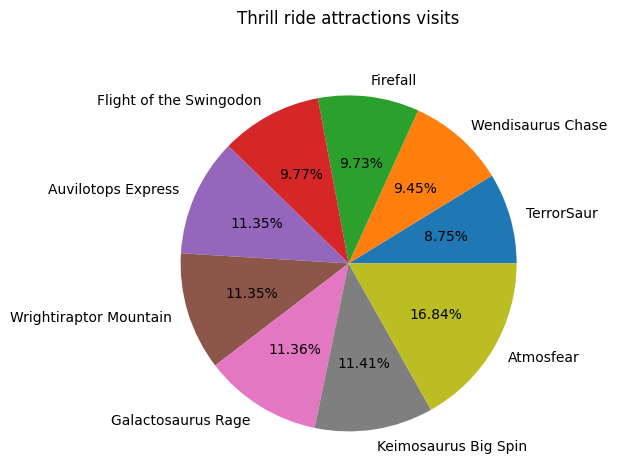

[['TerrorSaur', 14415], ['Wendisaurus Chase', 15577], ['Firefall', 16024], ['Flight of the Swingodon', 16093], ['Auvilotops Express', 18694], ['Wrightiraptor Mountain', 18700], ['Galactosaurus Rage', 18717], ['Keimosaurus Big Spin', 18792], ['Atmosfear', 27747]]


In [7]:
# Chart 1: A Pie Chart depicting visits to thrill ride attractions.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_connect = 'dinofunworld-1.db'
conn = sqlite3.connect(db_connect)
cursor = conn.cursor()

cursor.execute("SELECT attraction.Name, count(checkin.visitorId) as c \
            FROM checkin LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID \
            WHERE LOWER(attraction.Category) LIKE '%thrill%' \
            GROUP BY attraction.Name \
            ORDER BY c;")
count_visits = cursor.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['RideName', 'VisitCount'])
plt.pie(visit_stats['VisitCount'], labels=visit_stats['RideName'], autopct='%0.2f%%', shadow=False)
plt.axis('equal')
plt.title('Thrill ride attractions visits', pad=40)
plt.show()
print(visit_stats.values.tolist())

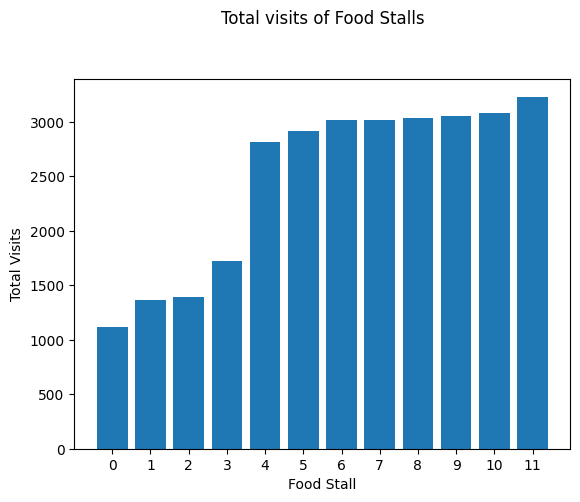

[['Theresaur Food Stop', 1116], ['Paleo Shreckwiches', 1361], ["Shilobite o'Pizza", 1393], ['Krystal Cook Cafe', 1725], ['Granite Slab Pizza', 2810], ['Plaisantly Popped Corn', 2914], ['EberTrex Fries', 3018], ['Permafrosties', 3018], ['Smoky Wood BBQ', 3037], ['Chensational Sweets', 3049], ['Floral Funnels', 3083], ['Ice Age Cones', 3228]]


In [9]:
# Chart 2: A Bar Chart depicting total visits to food stalls.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_connect = 'dinofunworld-1.db'
conn = sqlite3.connect(db_connect)
cursor = conn.cursor()

cursor.execute("SELECT attraction.Name, count(checkin.visitorId) as c \
            FROM checkin LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID \
            WHERE LOWER(attraction.Category) LIKE '%food%' \
            GROUP BY attraction.Name \
            ORDER BY c;")
count_visits = cursor.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['FoodStallName', 'VisitCount'])
plt.bar(range(len(visit_stats['FoodStallName'])), visit_stats['VisitCount'])
plt.ylabel('Total Visits')
plt.xlabel('Food Stall')
plt.xticks([x for x in range(len(visit_stats['FoodStallName']))])
plt.title('Total visits of Food Stalls', pad=40)
plt.show()
print(visit_stats.values.tolist())

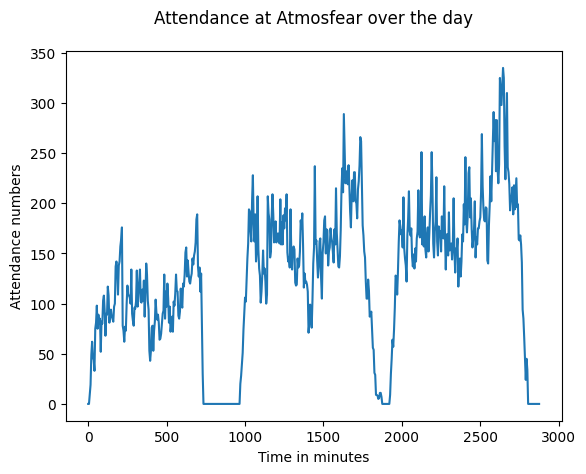

[[0, 0], [5, 0], [10, 9], [15, 19], [20, 49], [25, 62], [30, 46], [35, 44], [40, 33], [45, 75], [50, 81], [55, 98], [60, 75], [65, 89], [70, 80], [75, 85], [80, 52], [85, 82], [90, 80], [95, 103], [100, 108], [105, 93], [110, 68], [115, 90], [120, 89], [125, 117], [130, 108], [135, 81], [140, 89], [145, 94], [150, 87], [155, 85], [160, 82], [165, 97], [170, 100], [175, 137], [180, 142], [185, 134], [190, 109], [195, 138], [200, 142], [205, 157], [210, 164], [215, 176], [220, 78], [225, 73], [230, 62], [235, 77], [240, 73], [245, 99], [250, 118], [255, 109], [260, 108], [265, 106], [270, 100], [275, 134], [280, 90], [285, 83], [290, 78], [295, 96], [300, 95], [305, 102], [310, 133], [315, 97], [320, 110], [325, 121], [330, 134], [335, 102], [340, 101], [345, 114], [350, 103], [355, 123], [360, 87], [365, 111], [370, 140], [375, 129], [380, 103], [385, 94], [390, 53], [395, 43], [400, 53], [405, 76], [410, 78], [415, 53], [420, 73], [425, 82], [430, 104], [435, 91], [440, 84], [445, 89],

In [15]:
# Chart 3: A Line Chart depicting attendance at the newest ride, Atmosfear over the course of the day.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db_connect = 'dinofunworld-1.db'
conn = sqlite3.connect(db_connect)
cursor = conn.cursor()

cursor.execute("SELECT attractionId, Name FROM attraction where attraction.Name = 'Atmosfear';")
attractionID = cursor.fetchone()[0]
cursor.execute("SELECT visitorID, sequence FROM sequences where sequence LIKE '%" + str(attractionID) + "%';")
sequences = cursor.fetchall()
sequence_stats = pd.DataFrame.from_records(sequences, columns=['visitor', 'sequence'])
sequence_stats['sequence_list'] = sequence_stats['sequence'] \
.apply(lambda s: [1 if x == str(attractionID) else 0 for x in s.split("-")])
attendance = np.sum(sequence_stats['sequence_list'].values.tolist(), axis=0)
time_range = range(0, len(attendance)*5, 5)
plt.plot(time_range, attendance)
plt.ylabel('Attendance numbers')
plt.xlabel('Time in minutes')
plt.title('Attendance at Atmosfear over the day', pad=20)
plt.show()
result = [[time_range[i], attendance[i]] for i in range(len(time_range))]
print(result)

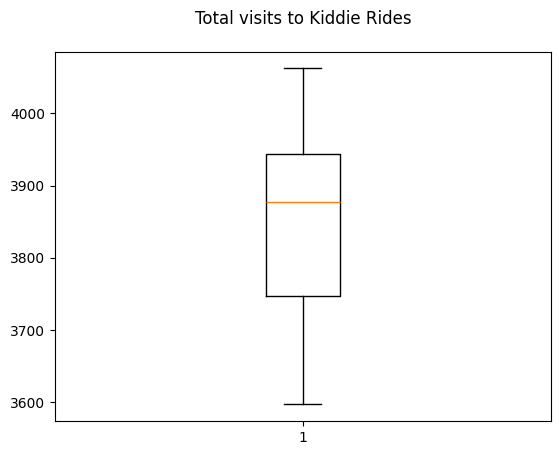

[3597, 3640, 3747, 3747, 3759, 3877, 3922, 3925, 3963, 4022, 4062]


In [19]:
# Chart 4: A Box-and-Whisker Plot depicting total visits to the park's Kiddie Rides.

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_connect = 'dinofunworld-1.db'
conn = sqlite3.connect(db_connect)
cursor = conn.cursor()

cursor.execute("SELECT attraction.Name, count(checkin.visitorId) as c \
            FROM checkin LEFT JOIN attraction ON checkin.attraction = attraction.AttractionID \
            WHERE LOWER(attraction.Category) LIKE '%kiddie%' \
            GROUP BY attraction.Name \
            ORDER BY c;")
count_visits = cursor.fetchall()
visit_stats = pd.DataFrame.from_records(count_visits, columns=['KiddieRideName', 'VisitCount'])
plt.boxplot(visit_stats['VisitCount'])
plt.title('Total visits to Kiddie Rides', pad=20)
plt.show()
print(visit_stats['VisitCount'].values.tolist())